In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [3]:
torch.manual_seed(42)

In [4]:
y=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
x=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')

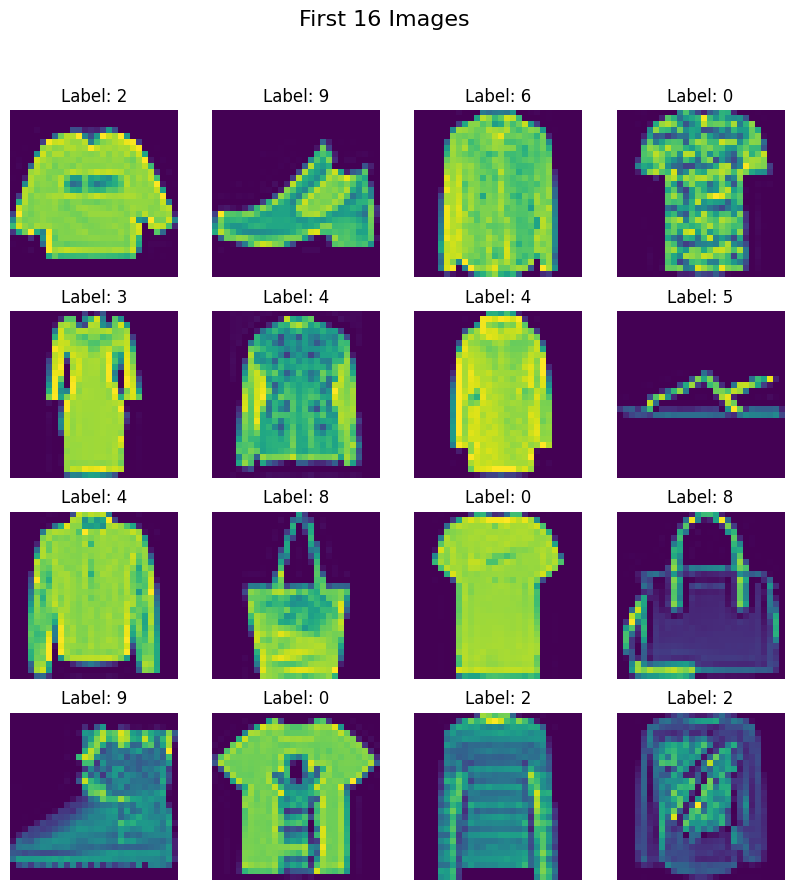

In [5]:
fig,axis=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 Images", fontsize=16)
for i,ax in enumerate(axis.flat):
    img=x.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {x.iloc[i, 0]}")

plt.show()

In [6]:
x

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train=x.iloc[:,1:].values
y_train=x.iloc[:,0].values
x_test=y.iloc[:,1:].values
y_test=y.iloc[:,0].values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
X_train = x_train/255.0
X_test = x_test/255.0

In [9]:
class CustomDataset(Dataset):
    def __init__(self,feature,label):
        self.feature=torch.tensor(feature,dtype=torch.float32)
        self.label=torch.tensor(label, dtype=torch.long)
    def __len__(self):
        return len(self.feature)
    def __getitem__(self,idx):
        return self.feature[idx],self.label[idx]

In [10]:
train_dataset=CustomDataset(X_train,y_train)

In [11]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.2431, 0.2392, 0.0824, 0.1137, 0.0902,
         0.2000, 0.5333, 0.2392, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [12]:
test_dataset=CustomDataset(X_test,y_test)

In [13]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True,pin_memory=True,drop_last=True)
test_loader=DataLoader(test_dataset,batch_size=31,shuffle=False,pin_memory=True,drop_last=True)

In [14]:
class MYNN(nn.Module):
    def __init__(self,feature):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(feature,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.model(x)
        

In [15]:
epochs = 100
learning_rate = 0.1

In [16]:
model=MYNN(X_train.shape[1])
model=model.to(device)
losses=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [17]:
len(train_loader)


937

In [18]:
for epoch in range(epochs):
    total_epoch_loss=0
    for batch_features,batch_label in train_loader:
        batch_features,batch_label=batch_features.to(device),batch_label.to(device)
        
        #forward pass
        output=model(batch_features)
        # loss
        loss=losses(output,batch_label)
        #backpass
        optimizer.zero_grad()
        loss.backward()

        #update weights
        optimizer.step()
        total_epoch_loss = total_epoch_loss + loss.item()

    avg_loss=total_epoch_loss/len(train_loader)
    print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 0.6892755796681601
Epoch: 2 , Loss: 0.44463500518077465
Epoch: 3 , Loss: 0.3962312574034185
Epoch: 4 , Loss: 0.3669053121940049
Epoch: 5 , Loss: 0.345944176679487
Epoch: 6 , Loss: 0.327770471286621
Epoch: 7 , Loss: 0.3154027989986994
Epoch: 8 , Loss: 0.30367525294025527
Epoch: 9 , Loss: 0.29230840510530687
Epoch: 10 , Loss: 0.2833832563035262
Epoch: 11 , Loss: 0.27616298927059807
Epoch: 12 , Loss: 0.26851277175809685
Epoch: 13 , Loss: 0.26041384840835374
Epoch: 14 , Loss: 0.25340274583822636
Epoch: 15 , Loss: 0.2477089170457968
Epoch: 16 , Loss: 0.2411798474676072
Epoch: 17 , Loss: 0.23635578878311364
Epoch: 18 , Loss: 0.22872340769816107
Epoch: 19 , Loss: 0.22398136824910134
Epoch: 20 , Loss: 0.22056848932308093
Epoch: 21 , Loss: 0.21657193276391085
Epoch: 22 , Loss: 0.21154982965189084
Epoch: 23 , Loss: 0.20723974675321782
Epoch: 24 , Loss: 0.2025427601937296
Epoch: 25 , Loss: 0.20004977122060516
Epoch: 26 , Loss: 0.19478903551016444
Epoch: 27 , Loss: 0.1934763896721

In [19]:
model.eval()

MYNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [20]:
# evaluation code
total = 0
correct = 0


with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Move tensors to the appropriate device
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)

        # Forward pass
        outputs = model(batch_features)

        # Get predictions
        _, predicted = torch.max(outputs, 1)

        # Update total and correct counts
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

# Calculate and print accuracy
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8871


# CNN


In [21]:
class CustomDataset(Dataset):
    def __init__(self,features,target):
        self.features=torch.tensor(features,dtype=torch.float32).reshape(-1,1,28,28)
        self.target=torch.tensor(target,dtype=torch.long)
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self,index):
        return self.features[index],self.target[index]

In [22]:
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [23]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [24]:
class MYNN(nn.Module):
    def __init__(self,input_features):
        super().__init__()

        self.features=nn.Sequential(
            nn.Conv2d(input_features,32,kernel_size=3,padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2,stride=2),

            nn.Conv2d(32,64,kernel_size=3,padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7,128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64,10)
            
        )
        
    def forward(self,x):
        x=self.features(x)
        x=self.classifier(x)
        return x

In [25]:
learning_rate=0.01
epochs=100

In [26]:
model=MYNN(1)
model.to(device)
critertion=nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

In [27]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = critertion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.5557031743884087
Epoch: 2 , Loss: 0.3251603869040807
Epoch: 3 , Loss: 0.279708531075716
Epoch: 4 , Loss: 0.249560841563344
Epoch: 5 , Loss: 0.22476847808857758
Epoch: 6 , Loss: 0.2049154577811559
Epoch: 7 , Loss: 0.19314490400701761
Epoch: 8 , Loss: 0.1780639472566545
Epoch: 9 , Loss: 0.16789972016314667
Epoch: 10 , Loss: 0.15207865489249428
Epoch: 11 , Loss: 0.14265169855405888
Epoch: 12 , Loss: 0.13370409579028686
Epoch: 13 , Loss: 0.1233153772495687
Epoch: 14 , Loss: 0.11732862492725253
Epoch: 15 , Loss: 0.10844572236494472
Epoch: 16 , Loss: 0.10383212645016611
Epoch: 17 , Loss: 0.09748137786462903
Epoch: 18 , Loss: 0.09252998060937971
Epoch: 19 , Loss: 0.08366654183110223
Epoch: 20 , Loss: 0.07829252600825082
Epoch: 21 , Loss: 0.07241914809923619
Epoch: 22 , Loss: 0.06990158406936874
Epoch: 23 , Loss: 0.06762134880494947
Epoch: 24 , Loss: 0.059502026204497085
Epoch: 25 , Loss: 0.06070823728544637
Epoch: 26 , Loss: 0.0560436910828265
Epoch: 27 , Loss: 0.0526631794

In [28]:
model.eval()

MYNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.3, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [29]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total) 

0.9282
